In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from ipywidgets import interact_manual

Using TensorFlow backend.


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


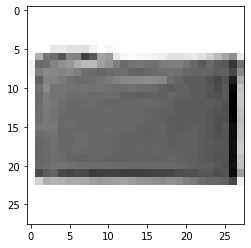

In [6]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

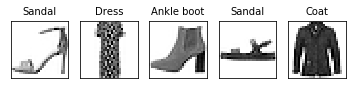

In [7]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train=x_train.reshape(60000,784)

In [11]:
x_test=x_test.reshape(10000,784)

In [12]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train=to_categorical(y_train,10)

In [15]:
y_test=to_categorical(y_test,10)

In [16]:
y_train[n]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
model.add(Dense(300, input_dim = 784, activation='sigmoid'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu')) ###改了神經元數量
model.add(Dense(10, activation='sigmoid')) ### 換一種方式

In [20]:
### 組裝我們的神經網路

In [21]:
model.compile(loss="mse",optimizer=SGD(lr=0.087),metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 337,910
Trainable params: 337,910
Non-trainable params: 0
_________________________________________________________________


In [23]:
### 訓練

In [24]:
model.fit(x_train,y_train,batch_size=100,epochs=66) ### 更改訓練次數

Epoch 1/66
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0628 - accuracy: 0.6164
Epoch 2/66
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0379 - accuracy: 0.7627
Epoch 3/66
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0319 - accuracy: 0.7960
Epoch 4/66
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0290 - accuracy: 0.8120
Epoch 5/66
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0274 - accuracy: 0.8201
Epoch 6/66
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0263 - accuracy: 0.8271
Epoch 7/66
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0253 - accuracy: 0.8333
Epoch 8/66
60000/60000 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.83 - 2s 28us/sample - loss: 0.0246 - accuracy: 0.8379
Epoch 9/66
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0243 - accuracy: 0.

In [25]:
### 訓練成本

In [26]:
result=model.predict_classes(x_test)

In [27]:
result

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [45]:
def my_predict(n):
    print('這是', class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap='Greys')
interact_manual(my_predict,n=(0,2000))

interactive(children=(IntSlider(value=1000, description='n', max=2000), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

這是 Coat


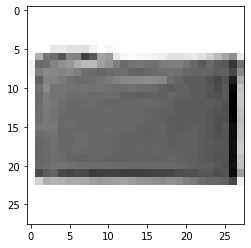

In [28]:
n = 1234
print('這是', class_names[result[n]])
plt.imshow(x_train[n].reshape(28,28), cmap='Greys');

這是 T-shirt/top


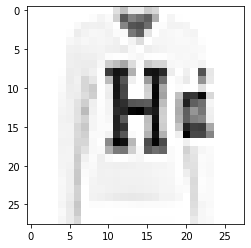

In [29]:
n = 1214
print('這是', class_names[result[n]])
plt.imshow(x_train[n].reshape(28,28), cmap='Greys');

這是 Sandal


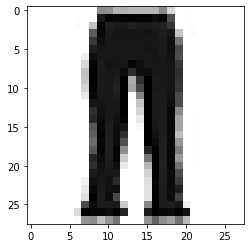

In [30]:
n = 1211
print('這是', class_names[result[n]])
plt.imshow(x_train[n].reshape(28,28), cmap='Greys');

In [34]:
model1 = Sequential()
model1.add(Dense(300, input_dim = 784, activation='sigmoid'))
model1.add(Dense(200, activation='relu'))
model1.add(Dense(87, activation='relu')) ###改了神經元數量
model1.add(Dense(10, activation='softmax')) ### 換一種方式
model1.compile(loss="mse",optimizer=SGD(lr=0.087),metrics=["accuracy"])

In [35]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_10 (Dense)             (None, 87)                17487     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                880       
Total params: 314,067
Trainable params: 314,067
Non-trainable params: 0
_________________________________________________________________


In [36]:
model1.fit(x_train,y_train,batch_size=100,epochs=20) ### 更改訓練次數

Epoch 1/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0568 - accuracy: 0.5962
Epoch 2/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0323 - accuracy: 0.7885
Epoch 3/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0280 - accuracy: 0.8099
Epoch 4/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0264 - accuracy: 0.8191
Epoch 5/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0258 - accuracy: 0.8214
Epoch 6/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0253 - accuracy: 0.8262
Epoch 7/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0245 - accuracy: 0.8307
Epoch 8/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0243 - accuracy: 0.8313
Epoch 9/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0241 - accuracy: 0.8326
Epoch 10/20
60000/60000 [============

這是 Coat


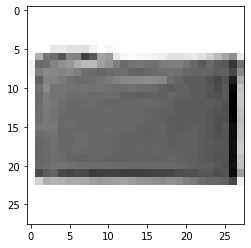

In [37]:
n = 1234
print('這是', class_names[result[n]])
plt.imshow(x_train[n].reshape(28,28), cmap='Greys');

In [46]:
result1=model.predict_classes(x_test)

In [47]:
def my_predict(n):
    print('這是', class_names[result1[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap='Greys')
interact_manual(my_predict,n=(0,2000))

interactive(children=(IntSlider(value=1000, description='n', max=2000), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>